In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [2]:
data = pd.read_csv('../Datasets/Deduplicated/gemini.csv')
print(data.columns)

Index(['context', 'question', 'answer', 'answer_start'], dtype='object')


In [3]:
data['context_length'] = data['context'].apply(lambda x: len(x))
data['question_length'] = data['question'].apply(lambda x: len(x))
data['answer_length'] = data['answer'].apply(lambda x: len(str(x)))

In [4]:
# Context length

data_context_length = data.drop_duplicates(["context"])['context_length'].to_list()

print("Context Length")
print(data.drop_duplicates(["context"])['context_length'].describe())

Context Length
count     3750.000000
mean       734.756000
std        390.315931
min         38.000000
25%        526.250000
50%        715.000000
75%        892.000000
max      12886.000000
Name: context_length, dtype: float64


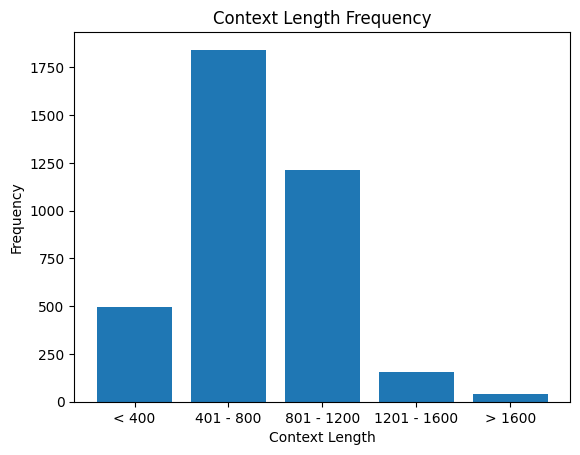

In [5]:
bins = [0, 400, 800, 1200, 1600, np.inf]
labels = ['< 400', '401 - 800', '801 - 1200', '1201 - 1600', '> 1600']

freqs, edges = np.histogram(data_context_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.title('Context Length Frequency')

plt.show()

In [6]:
# Question length

data_question_length = data.drop_duplicates(["question"])['question_length'].to_list()

print("Question Length")
print(data.drop_duplicates(["question"])['question_length'].describe())

Question Length
count    10818.000000
mean        43.862267
std         13.026597
min         14.000000
25%         35.000000
50%         43.000000
75%         52.000000
max        121.000000
Name: question_length, dtype: float64


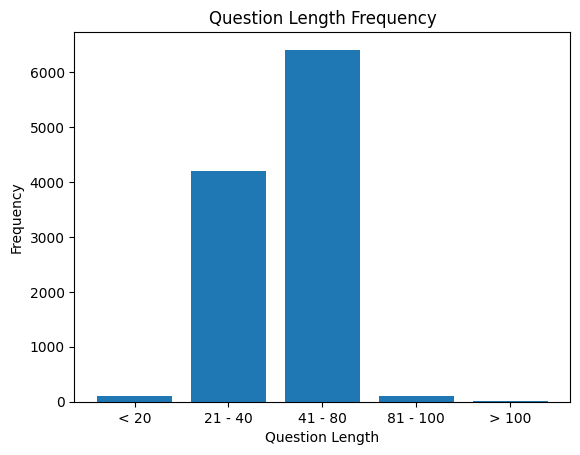

In [7]:
bins = [0, 20, 40, 80, 100, np.inf]
labels = ['< 20', '21 - 40', '41 - 80', '81 - 100', '> 100']

freqs, edges = np.histogram(data_question_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Question Length Frequency')

plt.show()

In [11]:
# Answer length

data_answer_length = data.drop_duplicates(["answer"])['answer_length'].to_list()

print("Answer Length")
print(data.drop_duplicates(["answer"])['answer_length'].describe())

Answer Length
count    7429.000000
mean       23.947503
std        18.638093
min         1.000000
25%        11.000000
50%        19.000000
75%        32.000000
max       197.000000
Name: answer_length, dtype: float64


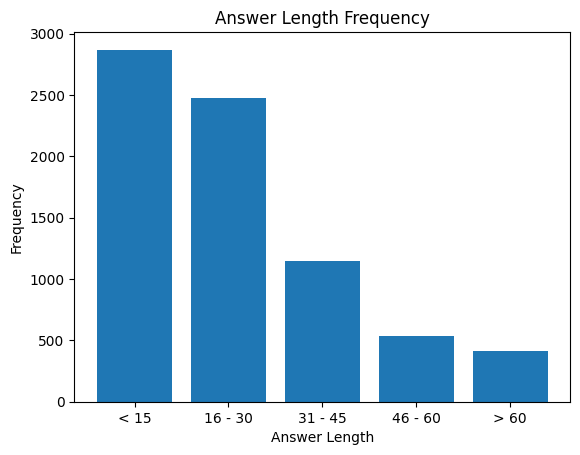

In [13]:
bins = [0, 15, 30, 45, 60, np.inf]
labels = ['< 15', '16 - 30', '31 - 45', '46 - 60', '> 60']

freqs, edges = np.histogram(data_answer_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Answer Length Frequency')

plt.show()

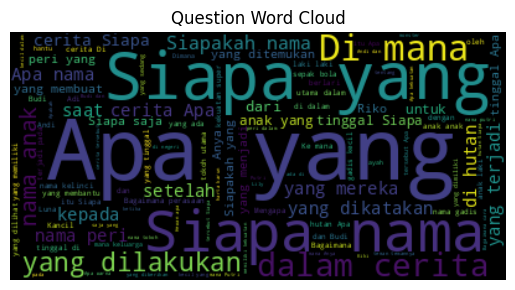

In [10]:
wordcloud = WordCloud().generate(" ".join(q for q in data['question']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Question Word Cloud')
plt.show()